### A bit of general information:
    This is being run on my local Linux Box. Ubuntu 16.04. Below are my Python Specs.

!python

Python 2.7.13 |Anaconda 4.3.1 (64-bit)| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)] on linux2
Type "help", "copyright", "credits" or "license" for more information.
Anaconda is brought to you by Continuum Analytics.
Please check out: http://continuum.io/thanks and https://anaconda.org
>>> 

#### A few of my resources:

http://stackoverflow.com/questions/6136588/image-cropping-using-python <br />
http://2017.compciv.org/guide/topics/python-nonstandard-libraries/pillow.html

In [7]:
from PIL import Image
im=Image.open('tensordream001.jpg')
im.size 
#Size will be displayed as a (width,height) tuple
#notice the original image was an odd number 451

(612, 451)

In [8]:
!ls

newimage.png		   tensor004.jpg  tensor008.jpg  tensor012.jpg
sizing-and-cropping.ipynb  tensor005.jpg  tensor009.jpg  tensor013.jpg
tensor002.jpg		   tensor006.jpg  tensor010.jpg  tensor014.jpg
tensor003.jpg		   tensor007.jpg  tensor011.jpg  tensordream001.jpg


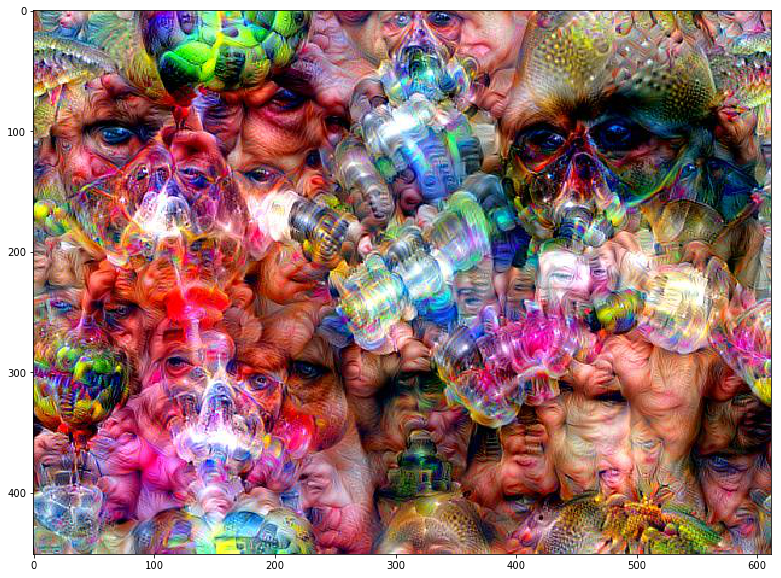

In [10]:
# Deep Dream Image Created with Tensorflow
import matplotlib.pyplot as plt
%matplotlib inline 
#The next line increases the default display size of matplotlib
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import matplotlib.image as mpimg
import numpy as np
img=mpimg.imread('tensordream001.jpg')
imgplot = plt.imshow(img)


In [11]:
from PIL import Image
img = Image.open('tensordream001.jpg')
#notice the " -51" It is a nice habit to keep image sizes at even numbers. the original image was 
crop_specs = (100, 100, img.width - 50, img.height - 51)
crop_img = img.crop(crop_specs)


crop_img.save('newimage.png')   

In [4]:
#This will pop open your default image viewer
im.show()

In [12]:
from PIL import Image
im=Image.open('newimage.png')
im.size # (width,height) tuple

(462, 300)

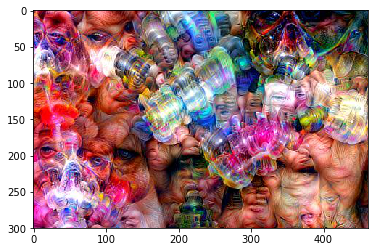

In [16]:
# If the imports already made, this cell works fine. If the modules 
# are not loaded and in cache then use the cell below this one.
img=mpimg.imread('newimage.png')
imgplot = plt.imshow(img)

In [15]:
def add_cursor(fig, ax):
    plt.close(fig)

    vline = ax.axvline(1, color='k')
    hline = ax.axhline(0.5, color='k')

    def set_cursor(x, y):
        vline.set_xdata((x, x))
        hline.set_ydata((y, y))
        display(fig)

    interact(set_cursor, x=ax.get_xlim(), y=ax.get_ylim())

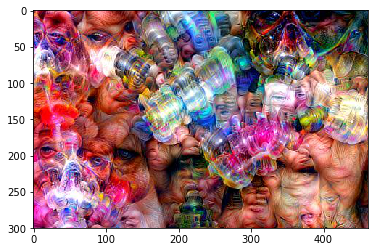

In [23]:
# Displaying the 'newimage' with mathplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
#The line increasing th default size has been commented out, so you may see the matplotlib default size
#plt.rcParams['figure.figsize'] = (20.0, 10.0)
import matplotlib.image as mpimg
import numpy as np
img=mpimg.imread('newimage.png')
imgplot = plt.imshow(img)


In [ ]:
http://mpld3.github.io/

#### install mpld
### !pip install mpld3<br />
/home/jack/anaconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: <br />
The `IPython.html` package has been deprecated. You should import from `notebook` instead.<br /> `IPython.html.widgets` has moved to `ipywidgets`. "`IPython.html.widgets` <br />
has moved to `ipywidgets`.", ShimWarning)<br />
Collecting mpld3<br />
  Downloading mpld3-0.3.tar.gz (788kB)<br />
    100% |████████████████████████████████| 798kB 792kB/s ta 0:00:01<br />
Building wheels for collected packages: mpld3<br />
  Running setup.py bdist_wheel for mpld3 ... - \ done<br />
  Stored in directory: /home/jack/.cache/pip/wheels/69/bc/68/7ca3b696749d183e998968fc24b0ff3c5e119d9e68bf495b07<br />
Successfully built mpld3<br />
Installing collected packages: mpld3<br />
Successfully installed mpld3-0.3<br />

In [20]:
#Just a touch of fun using mpld3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.path as mpath
import matplotlib.patches as mpatches

import mpld3
from mpld3 import plugins, utils


class LinkedDragPlugin(plugins.PluginBase):
    JAVASCRIPT = r"""
    mpld3.register_plugin("drag", DragPlugin);
    DragPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    DragPlugin.prototype.constructor = DragPlugin;
    DragPlugin.prototype.requiredProps = ["idpts", "idline", "idpatch"];
    DragPlugin.prototype.defaultProps = {}
    function DragPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    DragPlugin.prototype.draw = function(){
        var patchobj = mpld3.get_element(this.props.idpatch, this.fig);
        var ptsobj = mpld3.get_element(this.props.idpts, this.fig);
        var lineobj = mpld3.get_element(this.props.idline, this.fig);

        var drag = d3.behavior.drag()
            .origin(function(d) { return {x:ptsobj.ax.x(d[0]),
                                          y:ptsobj.ax.y(d[1])}; })
            .on("dragstart", dragstarted)
            .on("drag", dragged)
            .on("dragend", dragended);

        lineobj.path.attr("d", lineobj.datafunc(ptsobj.offsets));
        patchobj.path.attr("d", patchobj.datafunc(ptsobj.offsets,
                                                  patchobj.pathcodes));
        lineobj.data = ptsobj.offsets;
        patchobj.data = ptsobj.offsets;

        ptsobj.elements()
           .data(ptsobj.offsets)
           .style("cursor", "default")
           .call(drag);

        function dragstarted(d) {
          d3.event.sourceEvent.stopPropagation();
          d3.select(this).classed("dragging", true);
        }

        function dragged(d, i) {
          d[0] = ptsobj.ax.x.invert(d3.event.x);
          d[1] = ptsobj.ax.y.invert(d3.event.y);
          d3.select(this)
            .attr("transform", "translate(" + [d3.event.x,d3.event.y] + ")");
          lineobj.path.attr("d", lineobj.datafunc(ptsobj.offsets));
          patchobj.path.attr("d", patchobj.datafunc(ptsobj.offsets,
                                                    patchobj.pathcodes));
        }

        function dragended(d, i) {
          d3.select(this).classed("dragging", false);
        }
    }

    mpld3.register_plugin("drag", DragPlugin);
    """

    def __init__(self, points, line, patch):
        if isinstance(points, mpl.lines.Line2D):
            suffix = "pts"
        else:
            suffix = None

        self.dict_ = {"type": "drag",
                      "idpts": utils.get_id(points, suffix),
                      "idline": utils.get_id(line),
                      "idpatch": utils.get_id(patch)}


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices[:-1])
points = ax.plot(x, y, 'go', ms=10)
line = ax.plot(x, y, '-k')

ax.grid(True, color='gray', alpha=0.5)
ax.axis('equal')
ax.set_title("Drag Points to Change Path", fontsize=18)

plugins.connect(fig, LinkedDragPlugin(points[0], line[0], patch))

mpld3.display()

In [9]:
import matplotlib.pyplot as plt
import numpy as np

import mpld3
from mpld3 import plugins

fig, ax = plt.subplots()

x = np.linspace(-2, 2, 20)
y = x[:, None]
X = np.zeros((20, 20, 4))

X[:, :, 0] = np.exp(- (x - 1) ** 2 - (y) ** 2)
X[:, :, 1] = np.exp(- (x + 0.71) ** 2 - (y - 0.71) ** 2)
X[:, :, 2] = np.exp(- (x + 0.71) ** 2 - (y + 0.71) ** 2)
X[:, :, 3] = np.exp(-0.25 * (x ** 2 + y ** 2))

im = ax.imshow(X, extent=(10, 20, 10, 20),
               origin='lower', zorder=1, interpolation='nearest')
fig.colorbar(im, ax=ax)

ax.set_title('An Image', size=20)

plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()


#  SHOWING A MOUSE POSITION ON AN IMAGE 

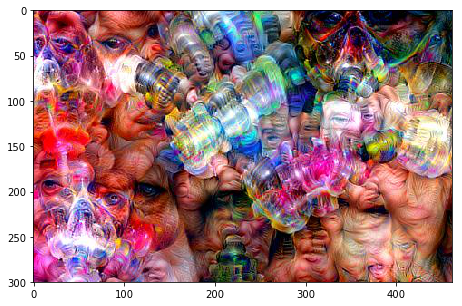

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 5.0)
import matplotlib.image as mpimg
import numpy as np
import mpld3
from mpld3 import plugins
#mpld3.enable_notebook()
img=mpimg.imread('newimage.png')
fig, ax = plt.subplots()


plugins.connect(fig, plugins.MousePosition(fontsize=14))
imgplot = plt.imshow(img)



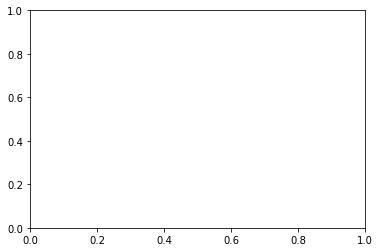

In [21]:
import matplotlib.pyplot as plt
from mpld3 import plugins
import mpld3
x=20
y=30
x, y = plt.subplots()
plugins.connect(x, plugins.MousePosition(fontsize=14))





#mpld3.display()

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 
#plt.rcParams['figure.figsize'] = (20.0, 10.0)
import matplotlib.image as mpimg
import numpy as np
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()
fig, ax = plt.subplots()

img=mpimg.imread('newimage.png')
#imgplot = plt.imshow(img)
plugins.connect(fig, plugins.MousePosition(fontsize=14))
imgplot = plt.imshow(img)
mpld3.display()


# -------------------------

In [ ]:
from mpld3 import plugins

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot (with tooltips!)", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
fig.plugins = [plugins.PointLabelTooltip(scatter, labels)]
plugins.connect(fig, plugins.MousePosition(fontsize=14))





mpld3.display()